In [5]:
# Import helpful libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the data, and separate the target
iowa_file_path = 'train.csv'
home_data = pd.read_csv(iowa_file_path)
y = home_data.SalePrice
home_data.drop(['SalePrice'], axis = 1, )

features = [
    'TotalBsmtSF', 'OverallQual', 'GrLivArea',
    'GarageCars', 'YearBuilt', 'Neighborhood',
    'Condition1', 'FullBath', 'KitchenQual', 'GarageFinish'
]

# Select columns corresponding to features
X = home_data[features]

# ✅ Encode for categorical columns
cols_to_encode = ['Neighborhood', 'Condition1', 'KitchenQual', 'GarageFinish']

# Fill NaNs just in case (اختیاری ولی گاهی لازمه)
X[cols_to_encode] = X[cols_to_encode].fillna('None')

# Label encode
for col in cols_to_encode:
    encoder = LabelEncoder()
    X[col] = encoder.fit_transform(X[col])

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Base Random Forest Model
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

C:\Users\izadi\AppData\Local\Temp\ipykernel_14212\3124105357.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cols_to_encode] = X[cols_to_encode].fillna('None')
C:\Users\izadi\AppData\Local\Temp\ipykernel_14212\3124105357.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = encoder.fit_transform(X[col])
C:\Users\izadi\AppData\Local\Temp\ipykernel_14212\3124105357.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

Validation MAE for Random Forest Model: 18,089


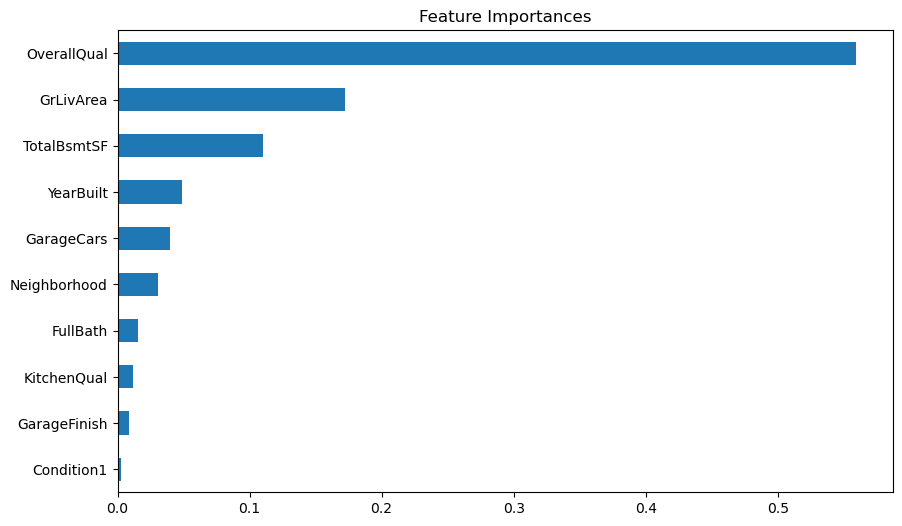

In [7]:
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
feature_names = train_X.columns

feat_importances = pd.Series(importances, index=feature_names)
feat_importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Feature Importances")
plt.show()


0       7
1       6
2       7
3       7
4       8
       ..
1455    6
1456    6
1457    7
1458    5
1459    5
Name: OverallQual, Length: 1460, dtype: int64

In [10]:
# Hyperparameter grid search
esti = [25, 50, 100, 150, 200]
depth = [15, 18, 20, 25, 30]
featrue = [2, 3, 4, 5, 6]
samples = [2, 3, 4, 5, 6]

result = []

for i in range(5):   
    for j in range(5):
        for k in range(5):
            for l in range(5):
                rf_model_on_full_data = RandomForestRegressor(
                    n_estimators = esti[i],
                    max_depth = depth[j],
                    max_features = featrue[k],
                    min_samples_split = samples[l],
                    random_state=1)
                
                rf_model_on_full_data.fit(train_X, train_y)
                pred = rf_model_on_full_data.predict(val_X)
                mae = mean_absolute_error(pred, val_y)

                result.append({
                    "n_estimators" : esti[i],
                    "max_depth" : depth[j],
                    "max_features" : featrue[k],
                    "min_samples_split" : samples[l],
                    "mae" : mae
                })

result_frame = pd.DataFrame(result)
sort_result_frame = result_frame.sort_values(by = "mae")
sort_result_frame.mae = sort_result_frame["mae"].astype(float).round(0)
sort_result_frame

,n_estimators,max_depth,max_features,min_samples_split,mae
39,25,18,4,6,17877.0
23,25,15,6,5,17882.0
531,200,18,3,3,17903.0
621,200,30,6,3,17964.0
275,100,18,2,2,17972.0
...,...,...,...,...,...
3,25,15,2,5,19198.0
107,25,30,3,4,19233.0
82,25,25,3,4,19233.0
9,25,15,3,6,19250.0


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
maee = sort_result_frame[sort_result_frame.mae < 18500.0]
maee

,n_estimators,max_depth,max_features,min_samples_split,mae
39,25,18,4,6,17877.0
23,25,15,6,5,17882.0
531,200,18,3,3,17903.0
621,200,30,6,3,17964.0
275,100,18,2,2,17972.0
...,...,...,...,...,...
278,100,18,2,5,18489.0
131,50,15,3,3,18489.0
528,200,18,2,5,18493.0
72,25,20,6,4,18494.0


In [12]:
sns.lineplot(x='n_estimators', y='mae', hue='max_depth', data=maee, marker="o")


NameError: name 'sns' is not defined

<Axes: xlabel='n_estimators', ylabel='mae'>

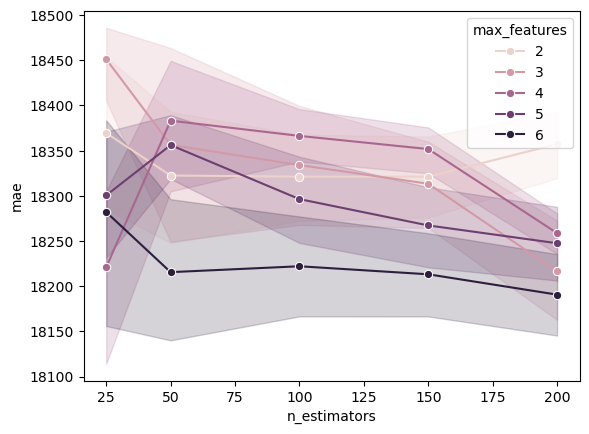

In [46]:
sns.lineplot(x='n_estimators', y='mae', hue='max_features', data=maee, marker="o")


<Axes: xlabel='n_estimators', ylabel='mae'>

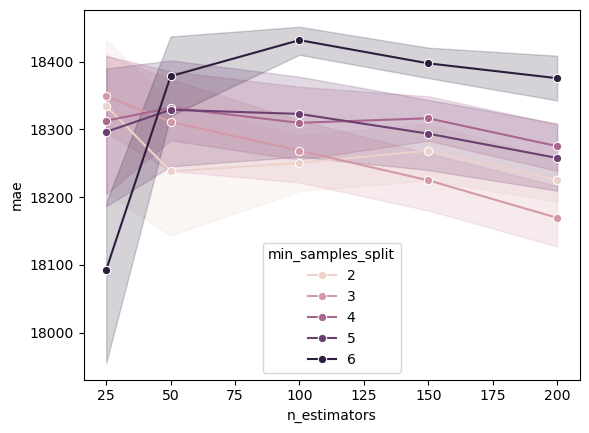

In [48]:
sns.lineplot(x='n_estimators', y='mae', hue='min_samples_split', data=maee, marker="o")


<Axes: xlabel='max_depth', ylabel='mae'>

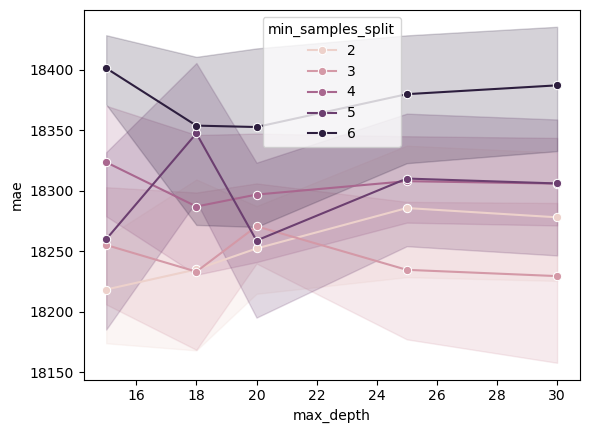

In [50]:
sns.lineplot(x='max_depth', y='mae', hue='min_samples_split', data=maee, marker="o")


In [59]:
esti = [20, 21, 22, 23, 24, 25]
depth = [20, 21, 22, 23, 24, 25]
featrue = [4, 5, 6, 7 ,8]
samples = [2, 3, 4, 5, 6]
result_2 = []
for i in range(len(esti)):   
    for j in range(len(depth)):
        for k in range(len(featrue)):
            for l in range(len(samples)):
                rf_model_on_full_data = RandomForestRegressor(
                    
                    n_estimators = esti[i],
                    max_depth = depth[j],
                    max_features = featrue[k],
                    min_samples_split = samples[l],
                    random_state=1)
                
                rf_model_on_full_data.fit(train_X, train_y)
                pred = rf_model_on_full_data.predict(val_X)
                mae = mean_absolute_error(pred, val_y)
                result_2.append({
                    "n_estimators" : esti[i],
                    "max_depth" : depth[j],
                    "max_features" : featrue[k],
                    "min_samples_split" : samples[l],
                    "mae" : mae
                })
            

In [61]:
result_frame_2 = pd.DataFrame(result_2)
sort_result_frame_2 = result_frame_2.sort_values(by = "mae")
sort_result_frame_2.head()

,n_estimators,max_depth,max_features,min_samples_split,mae
635,24,21,6,2,17810.359206
785,25,21,6,2,17858.608655
335,22,21,6,2,17862.753062
485,23,21,6,2,17871.540928
35,20,21,6,2,17925.879054


In [63]:
sort_result_frame_2.mae = sort_result_frame_2["mae"].astype(float).round(0)
sort_result_frame_2

,n_estimators,max_depth,max_features,min_samples_split,mae
635,24,21,6,2,17810.0
785,25,21,6,2,17859.0
335,22,21,6,2,17863.0
485,23,21,6,2,17872.0
35,20,21,6,2,17926.0
...,...,...,...,...,...
89,20,23,6,6,19458.0
14,20,20,6,6,19489.0
297,21,25,8,4,19508.0
272,21,24,8,4,19508.0


In [14]:
esti = [12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25]
depth = [18, 19, 20, 21, 22, 23, 24, 25]
featrue = [3, 4, 5, 6, 7 ,8]             
samples = [2, 3, 4, 5]
result_3 = []
for i in range(7):   
    for j in range(4):
        for k in range(3):
            for l in range(3):
                rf_model_on_full_data = RandomForestRegressor(
                    
                    n_estimators = esti[i],
                    max_depth = depth[j],
                    max_features = featrue[k],
                    min_samples_split = samples[l],
                    random_state=1)
                rf_model_on_full_data.fit(train_X, train_y)
                pred = rf_model_on_full_data.predict(val_X)
                mae = mean_absolute_error(pred, val_y)
                result_3.append({
                    "n_estimators" : esti[i],
                    "max_depth" : depth[j],
                    "max_features" : featrue[k],
                    "min_samples_split" : samples[l],
                    "mae" : mae
                })

In [16]:
result_frame_3 = pd.DataFrame(result_3)
sort_result_frame_3 = result_frame_3.sort_values(by = "mae")
sort_result_frame_3.head()

,n_estimators,max_depth,max_features,min_samples_split,mae
198,17,20,3,2,18141.461704
210,17,21,4,2,18145.535119
126,15,20,3,2,18165.741869
234,18,20,3,2,18202.480448
162,16,20,3,2,18205.496725


In [18]:
sort_result_frame_3.mae = sort_result_frame_3["mae"].astype(float).round(0)
sort_result_frame_3

,n_estimators,max_depth,max_features,min_samples_split,mae
198,17,20,3,2,18141.0
210,17,21,4,2,18146.0
126,15,20,3,2,18166.0
234,18,20,3,2,18202.0
162,16,20,3,2,18205.0
...,...,...,...,...,...
41,13,18,4,4,20053.0
51,13,19,5,2,20065.0
11,12,19,3,4,20158.0
5,12,18,4,4,20264.0


In [24]:
test_data = pd.read_csv("test.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [28]:
features = [
    'TotalBsmtSF', 'OverallQual', 'GrLivArea',
    'GarageCars', 'YearBuilt', 'Neighborhood',
    'Condition1', 'FullBath', 'KitchenQual', 'GarageFinish'
]
P = test_data[features]

# ✅ Encode for categorical columns
cols_to_encode = ['Neighborhood', 'Condition1', 'KitchenQual', 'GarageFinish']

# Fill NaNs just in case (اختیاری ولی گاهی لازمه)
P[cols_to_encode] = P[cols_to_encode].fillna('None')

# Label encode
for col in cols_to_encode:
    encoder = LabelEncoder()
    P[col] = encoder.fit_transform(P[col])

P.head()

C:\Users\izadi\AppData\Local\Temp\ipykernel_14212\3317574548.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  P[cols_to_encode] = P[cols_to_encode].fillna('None')
C:\Users\izadi\AppData\Local\Temp\ipykernel_14212\3317574548.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  P[col] = encoder.fit_transform(P[col])
C:\Users\izadi\AppData\Local\Temp\ipykernel_14212\3317574548.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

,TotalBsmtSF,OverallQual,GrLivArea,GarageCars,YearBuilt,Neighborhood,Condition1,FullBath,KitchenQual,GarageFinish
0,882.0,5,896,1.0,1961,12,1,1,4,3
1,1329.0,6,1329,1.0,1958,12,2,1,2,3
2,928.0,5,1629,2.0,1997,8,2,2,4,0
3,926.0,6,1604,2.0,1998,8,2,2,2,0
4,1280.0,8,1280,2.0,1992,22,2,2,2,2


In [30]:
rf_model_on_full_data = RandomForestRegressor(n_estimators = 24, max_depth = 21, max_features = 6, min_samples_split = 2, random_state=1)
rf_model_on_full_data.fit(train_X, train_y)
pred = rf_model_on_full_data.predict(val_X)
mae = mean_absolute_error(pred, val_y)
print("Validation MAE for Random Forest Model: {:,.0f}".format(mae))

Validation MAE for Random Forest Model: 17,810


In [40]:
rf_model_on_full_data = RandomForestRegressor(n_estimators = 24, max_depth = 21, max_features = 6, min_samples_split = 2, random_state=1)
rf_model_on_full_data.fit(X, y)
pred = rf_model_on_full_data.predict(P)
pred

array([119081.28472222, 144037.5       , 161706.88888889, ...,
       138341.66666667, 102593.75      , 231896.875     ])

In [42]:
predicted = pd.DataFrame({
    "Id": test_data.Id,
    "SalePrice": pred
})
predicted

,Id,SalePrice
0,1461,119081.284722
1,1462,144037.500000
2,1463,161706.888889
3,1464,191812.500000
4,1465,215909.083333
...,...,...
1454,2915,84385.416667
1455,2916,81197.916667
1456,2917,138341.666667
1457,2918,102593.750000


In [44]:
predicted.to_csv('submission.csv',  index=False)

In [46]:
submission = pd.read_csv("submission.csv")
submission

,Id,SalePrice
0,1461,119081.284722
1,1462,144037.500000
2,1463,161706.888889
3,1464,191812.500000
4,1465,215909.083333
...,...,...
1454,2915,84385.416667
1455,2916,81197.916667
1456,2917,138341.666667
1457,2918,102593.750000
